# Análisis Exploratorio de Datos y Modelos de Machine Learning para analisis del rendimiento de empleados de IBM

In [242]:
# Librerias para EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Librerias para Machine Learning
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Librerias para Redes Neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint

# Esto no importa jajaja
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


## Cargamos el dataset

In [41]:
Df = pd.read_csv(r'/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
Df.head()
df = Df.copy()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [43]:
df.iloc[:,:20].head()  # primeras 20 columnas

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632


In [44]:
df.iloc[:,20:].head()  # otras columnas a partir de la 20

,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## EDA del Dataset

In [45]:
df.isnull().sum()  # verificamos que no hayan valores nulos

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [46]:
df.duplicated().any()  # verificamos que no hayan filas duplicadas

False

In [47]:
print(df['EmployeeCount'].unique())  # nos damos cuenta de que esta columna es obsoleta

print(df['Over18'].unique()) # y tambien la columna Over18, ya que todos son mayores de edad

# asi como tambien lo es la columna de EmployeeNumber (identificador)

df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18'])  # entonces los eliminamos

[1]
['Y']


In [48]:
print(df['StandardHours'].unique())  # horas que el empleado debe trabajar

df['HourlyRateDiff'] = df['HourlyRate'] - df['StandardHours']  # horas que empleado trabaja de mas (o menos)

df = df.drop(columns=['HourlyRate', 'StandardHours'])  # estas columnas ya no aportan info

[80]


In [49]:
df.info()  # estas son las columnas que quedaron finalmente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [50]:
df[['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']].describe()
# Notese que los años que un empleado lleva en un rol no necesariamente son iguales a
# los años desde la ultima vez que los ascendieron (YearsInCurrentRole != YearsSinceLastPromotion)
# Es decir, un mismo rol puede tener varios escalafones

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,11.279592,7.008163,4.229252,2.187755
std,7.780782,6.126525,3.623137,3.222430
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,2.000000,0.000000
50%,10.000000,5.000000,3.000000,1.000000
75%,15.000000,9.000000,7.000000,3.000000
max,40.000000,40.000000,18.000000,15.000000


In [51]:
###########################
### FEATURES CATEGORIES ###
###########################

BasicInfo = {'Age': "Employee's age",
             'Gender': "Employee's Gender",
             'DistanceFromHome': 'Distance from home in miles to work',
             'MaritalStatus': "Employee's marital status",
             'NumCompaniesWorked': 'Number of companies the employee worked for',
             'Over18': 'Whether the employee is over 18 years old',
             'TotalWorkingYears': 'Total number of years the employee has worked'}

Feeling = {'EnvironmentSatisfaction': 'Employee satisfaction with their working environment',
           'JobSatisfaction': 'Employee satisfaction with their work',
           'RelationshipSatisfaction': 'Employee satisfaction with their relationships',
           'WorkLifeBalance': "Employees' perception of their work-life balance",
           'Attrition': 'Does the employee leave the organization'}  # importante

Finance = {'DailyRate':	'Daily salary rate for employees',
           'MonthlyRate': 'Monthly salary rate for employees',
           'PercentSalaryHike': 'Salary increase rate for employees',
           'StockOptionLevel': 'Employee stock option level'}

Education = {'Education': 'Level of education achieved by staff',
             'EducationField': "Employee's field of study"}

WorkingTime = {'HourlyRate': 'Hourly rate for employees',
               'StandardHours': 'Standard working hours for employees',
               'HourlyRateDiff': 'Difference between HourlyRate and StandardHours',
               'OverTime': 'Do employees work overtime',
               'YearsAtCompany': 'Number of years employees have been with the company',
               'YearsInCurrentRole': 'Number of years the employee has been in their current role',
               'YearsSinceLastPromotion': "Number of years since employee's last promotion",
               'YearsWithCurrManager': 'Number of years an employee has been with their current manager',
               'TrainingTimesLastYear': 'Number of times employees were taken to training in the last year'}

Job = {'Department': 'Office of employees',
       'BusinessTravel': "Frequency of employees' business trips",
       'JobInvolvement': "Level of involvement required for the employee's job",
       'JobLevel': "Employee's level of work",
       'JobRole': 'The role of employees in the organization',
       'PerformanceRating': 'The performance rating of the employee'}

In [52]:
############
### MAPS ###
############

EducationMap = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}

EnvironmentSatisfactionMap = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

JobInvolvementMap = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

JobSatisfactionMap = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

PerformanceRatingMap = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}

RelationshipSatisfactionMap = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

WorkLifeBalanceMap = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}

In [53]:
print('JobLevel :', df['JobLevel'].unique())  # estos dos no tiene mapeos asociados
print('StockOptionLevel :', df['StockOptionLevel'].unique())

JobLevel : [2 1 3 4 5]
StockOptionLevel : [0 1 3 2]


In [54]:
####################
### INVERSE MAPS ###
####################

print(df['BusinessTravel'].unique())
BusinessTravelMap = {0: 'Non-Travel', 1: 'Travel_Rarely', 2: 'Travel_Frequently'}
df['BusinessTravel'] = df['BusinessTravel'].map({value:key for (key,value) in BusinessTravelMap.items()})

# Bools...

print(df['Attrition'].unique())
AttritionMap = {0: 'No', 1: 'Yes'}
df['Attrition'] = df['Attrition'].map({value:key for (key,value) in AttritionMap.items()})

print(df['OverTime'].unique())
OverTimeMap = {0: 'No', 1: 'Yes'}
df['OverTime'] = df['OverTime'].map({value:key for (key,value) in OverTimeMap.items()})

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Yes' 'No']
['Yes' 'No']


In [55]:
df1 = df.select_dtypes('object')  # columnas de tipo object
df1.head()

,Department,EducationField,Gender,JobRole,MaritalStatus
0,Sales,Life Sciences,Female,Sales Executive,Single
1,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Research & Development,Other,Male,Laboratory Technician,Single
3,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Research & Development,Medical,Male,Laboratory Technician,Married


In [56]:
for col in df1.columns:
    print(df1[col].unique())  # valores unicos de las variables categoricas (no ordinales)

['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']


In [57]:
df1 = df.select_dtypes('int64')  # columnas de tipo number (incluyendo encoded columns)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HourlyRateDiff
0,41,1,1,1102,1,2,2,3,2,4,...,1,0,8,0,1,6,4,0,5,14
1,49,0,2,279,8,1,3,2,2,2,...,4,1,10,3,3,10,7,1,7,-19
2,37,1,1,1373,2,2,4,2,1,3,...,2,0,7,3,3,0,0,0,0,12
3,33,0,2,1392,3,4,4,3,1,3,...,3,0,8,3,3,8,7,3,0,-24
4,27,0,1,591,2,1,1,3,1,2,...,4,1,6,3,3,2,2,2,2,-40


In [72]:
df_ = df.copy()

# Mapeamos de nuevo las variables categoricas con sus etiquetas correspondientes

df_['Education'] = df_['Education'].map(EducationMap)
df_['EnvironmentSatisfaction'] = df_['EnvironmentSatisfaction'].map(EnvironmentSatisfactionMap)
df_['JobInvolvement'] = df_['JobInvolvement'].map(JobInvolvementMap)
df_['JobSatisfaction'] = df_['JobSatisfaction'].map(JobSatisfactionMap)
df_['PerformanceRating'] = df_['PerformanceRating'].map(PerformanceRatingMap)
df_['RelationshipSatisfaction'] = df_['RelationshipSatisfaction'].map(RelationshipSatisfactionMap)
df_['WorkLifeBalance'] = df_['WorkLifeBalance'].map(WorkLifeBalanceMap)
df_['BusinessTravel'] = df_['BusinessTravel'].map(BusinessTravelMap)
df_['OverTime'] = df_['OverTime'].map(OverTimeMap)
# ...excepto la variable objetivo Attrition

df_['Attrition_'] = df_['Attrition'].map(AttritionMap)

# ...pero removiendo del df_ las columnas que no tiene un mapeo correspondiente
df_ = df_.drop(columns=['StockOptionLevel', 'JobLevel'])

### Variables Categoricas

In [73]:
dfcat = df_.select_dtypes('object')  # variables fundamentalmente categoricas
dfcat.head()

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition_
0,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Sales Executive,Very High,Single,Yes,Excellent,Low,Bad,Yes
1,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Research Scientist,Medium,Married,No,Outstanding,Very High,Better,No
2,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Laboratory Technician,High,Single,Yes,Excellent,Medium,Better,Yes
3,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Research Scientist,High,Married,Yes,Excellent,High,Better,No
4,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Laboratory Technician,Medium,Married,No,Excellent,Very High,Better,No


In [92]:
dfcat['RelationshipSatisfaction'].value_counts().sort_values()

RelationshipSatisfaction
Low          276
Medium       303
Very High    432
High         459
Name: count, dtype: int64

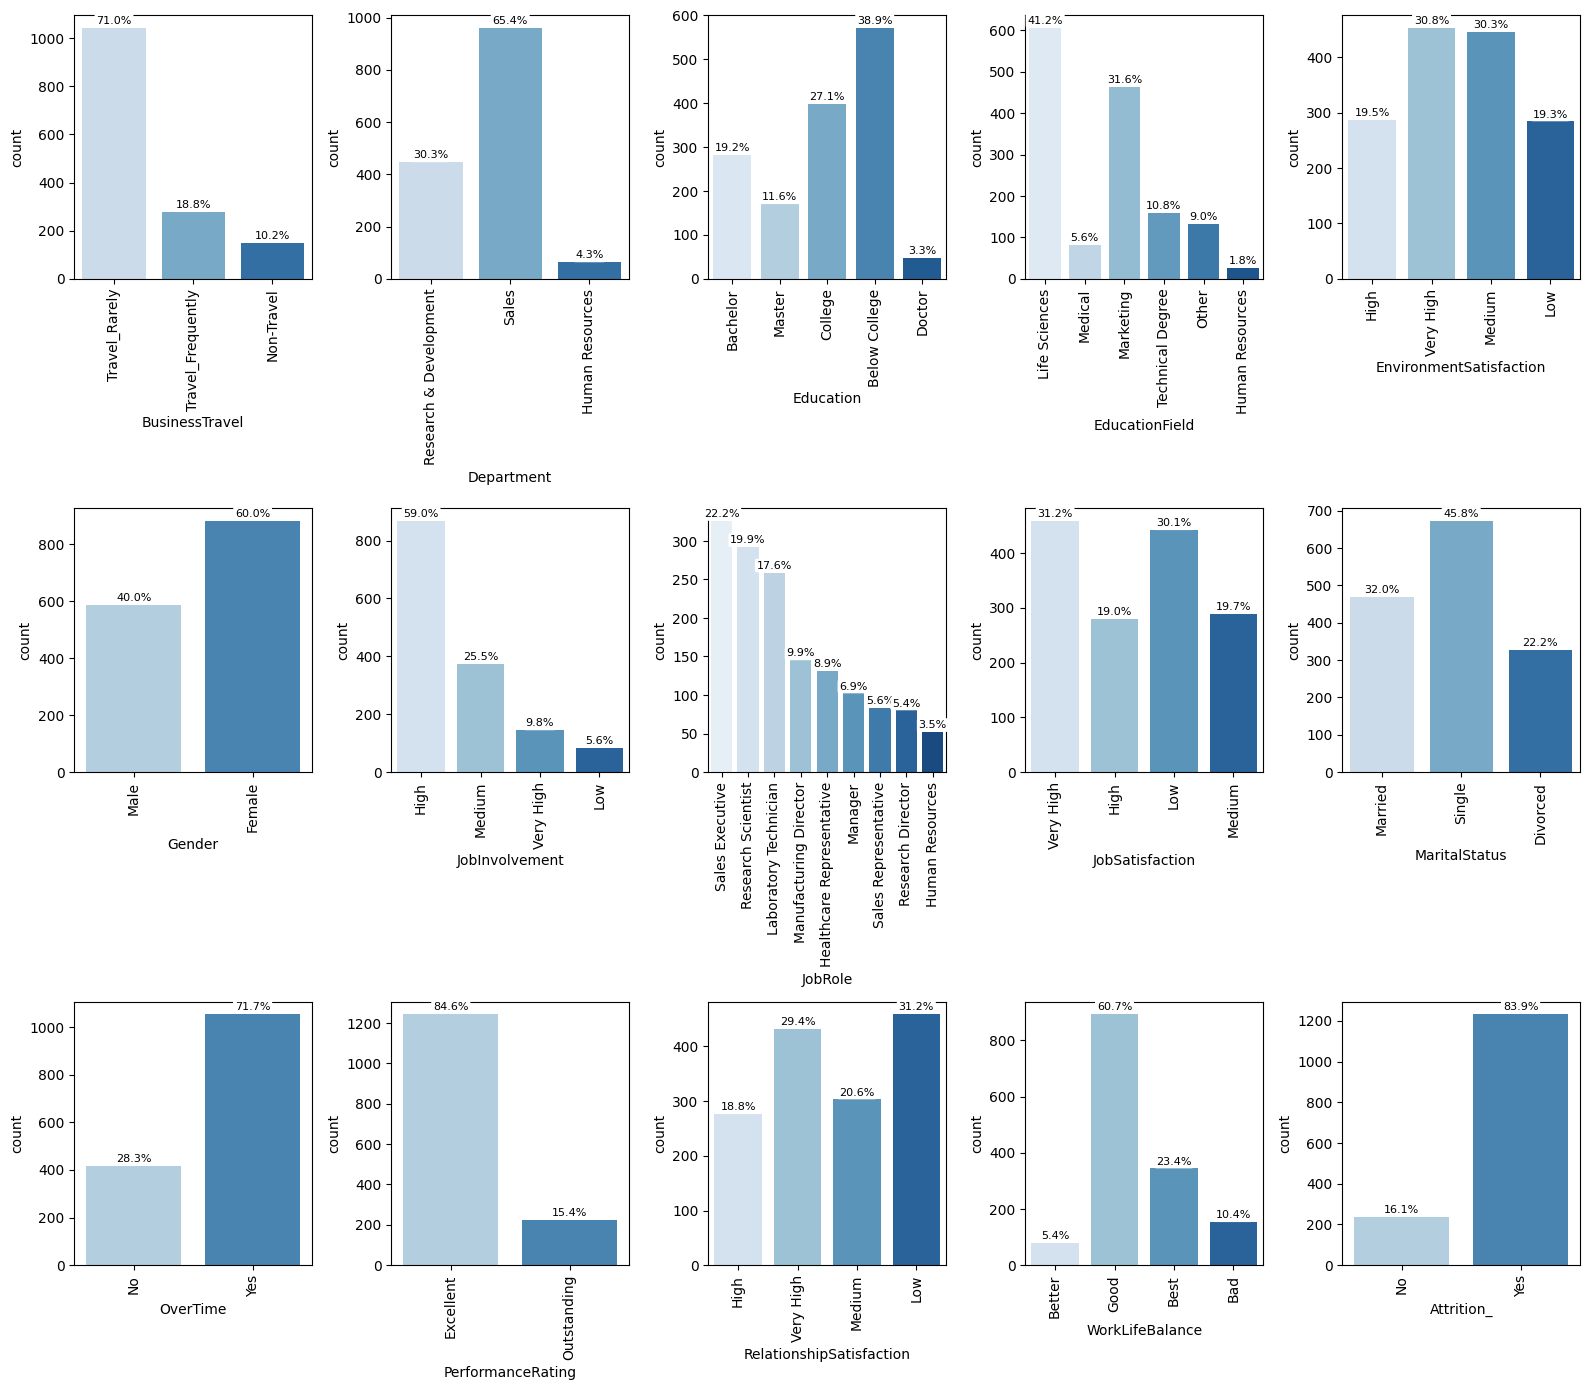

In [194]:
# Histogramas de cada una de las variables categoricas
fig, axes = plt.subplots(3, 5, figsize=(16,14))

prow = 0
pcol = 0
for col in dfcat.columns:
    if pcol != 0 and pcol % 5 == 0:
        prow += 1
        pcol = 0
    ax = sns.countplot(data=dfcat, x=col, ax=axes[prow,pcol], palette='Blues')
    categories = [var for var in dfcat[col].value_counts().index]
    ax.set_xticklabels(categories, rotation=90)
    
    freqs = [p.get_height() for p in ax.patches]
    totalcat = sum(freqs)
    percens = np.zeros_like(freqs)
    for ir, row in enumerate(freqs):
        percens[ir] = round(freqs[ir] * 100 / totalcat, 1)
    
    for ip, p in enumerate(ax.patches):
        bbox_props = {'boxstyle': "round,pad=0.1", 'facecolor': "white", 'edgecolor': "white"}
        ax.annotate(f'{percens[ip]}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points', bbox=bbox_props)
    pcol += 1

plt.tight_layout()
plt.show()

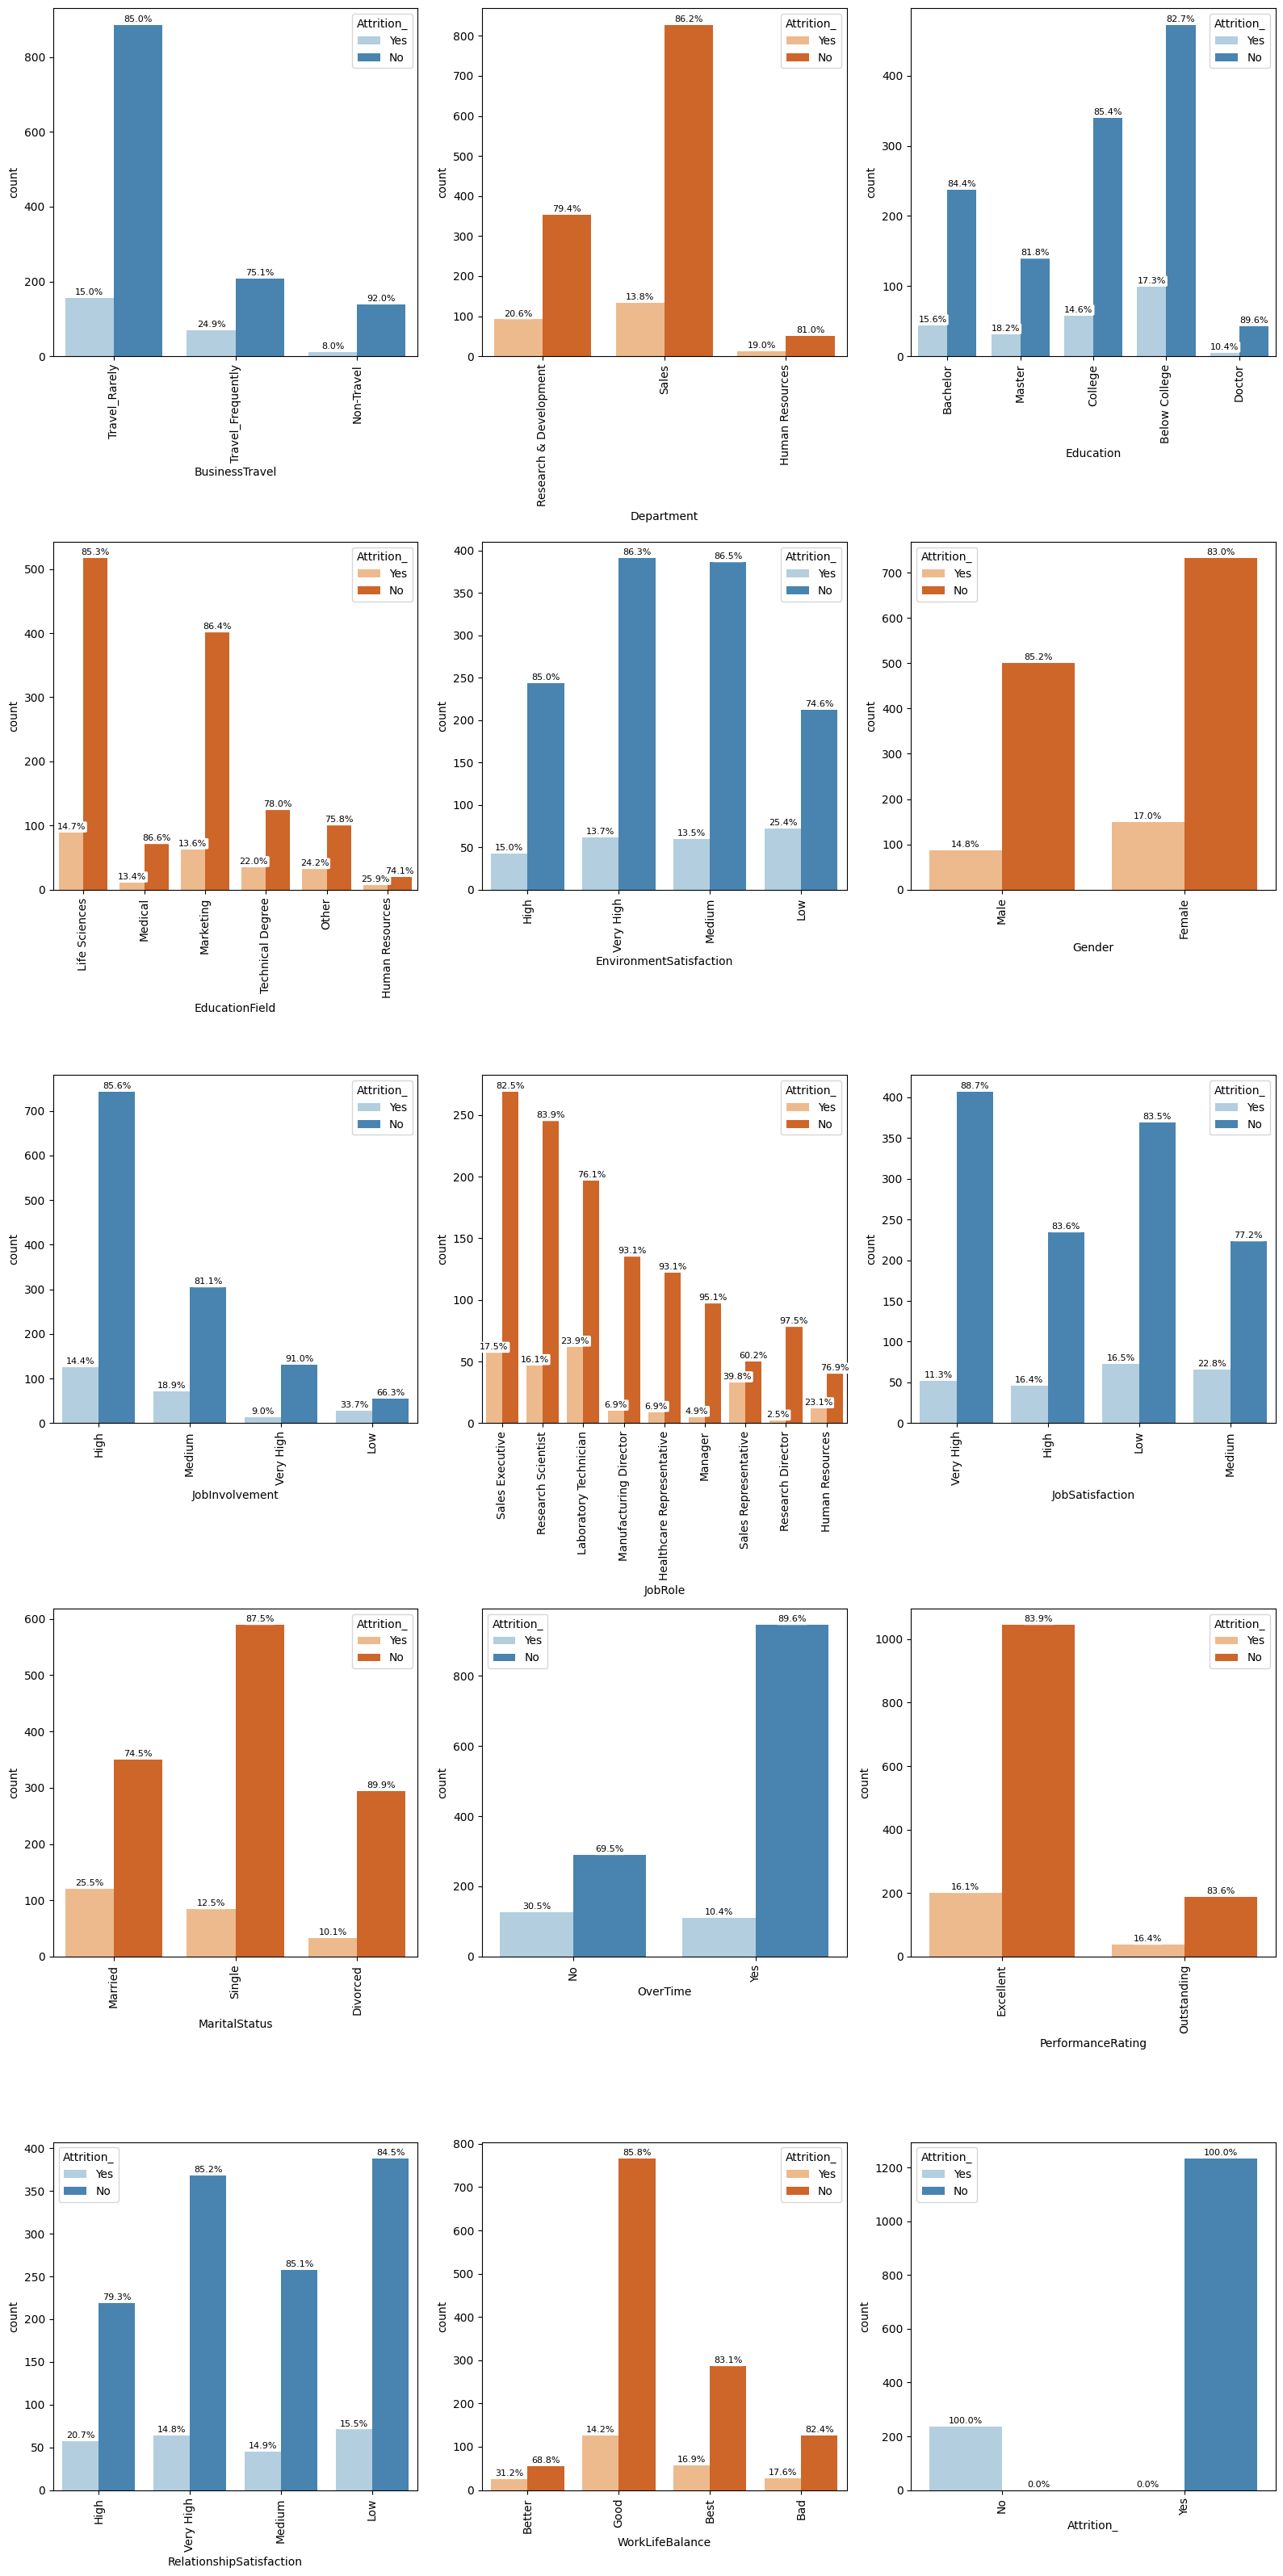

In [195]:
# Mismos histogramas de arriba pero separando por Attrition
fig, axes = plt.subplots(5, 3, figsize=(16,32))
palettes = [['Blues', 'Oranges', 'Blues'],
            ['Oranges','Blues', 'Oranges'],
            ['Blues', 'Oranges', 'Blues'],
            ['Oranges','Blues', 'Oranges'],
            ['Blues', 'Oranges','Blues']]

prow = 0
pcol = 0
for col in dfcat.columns:
    if pcol != 0 and pcol % 3 == 0:
        prow += 1
        pcol = 0
    ax = sns.countplot(data=dfcat, x=col, ax=axes[prow,pcol], hue='Attrition_', palette=palettes[prow][pcol])
    categories = [var for var in dfcat[col].value_counts().index]
    ax.set_xticklabels(categories, rotation=90)
    
    freqs = [p.get_height() for p in ax.patches]
    totalcat = sum(freqs)
    freqs = np.array(freqs).reshape(2,-1).T
    percens = np.zeros_like(freqs)
    for ir, row in enumerate(freqs):
        total = row.sum()
        for ic, col in enumerate(row):
            percens[ir][ic] = round(freqs[ir][ic] * 100 / total, 1)
            #percens[ir][ic] = round(freqs[ir][ic] * 100 / totalcat, 1)
    percens = percens.T.reshape(1,-1)[0]
    
    for ip, p in enumerate(ax.patches):
        bbox_props = {'boxstyle': "round,pad=0.1", 'facecolor': "white", 'edgecolor': "white"}
        ax.annotate(f'{percens[ip]}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points', bbox=bbox_props)
    pcol += 1

plt.tight_layout()
plt.show()

### Variables Numéricas

In [61]:
dfnum = df_.select_dtypes('int64')  # variables fundamentalmente numericas
dfnum.head()

,Age,Attrition,DailyRate,DistanceFromHome,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HourlyRateDiff
0,41,1,1102,1,5993,19479,8,11,8,0,6,4,0,5,14
1,49,0,279,8,5130,24907,1,23,10,3,10,7,1,7,-19
2,37,1,1373,2,2090,2396,6,15,7,3,0,0,0,0,12
3,33,0,1392,3,2909,23159,1,11,8,3,8,7,3,0,-24
4,27,0,591,2,3468,16632,9,12,6,3,2,2,2,2,-40


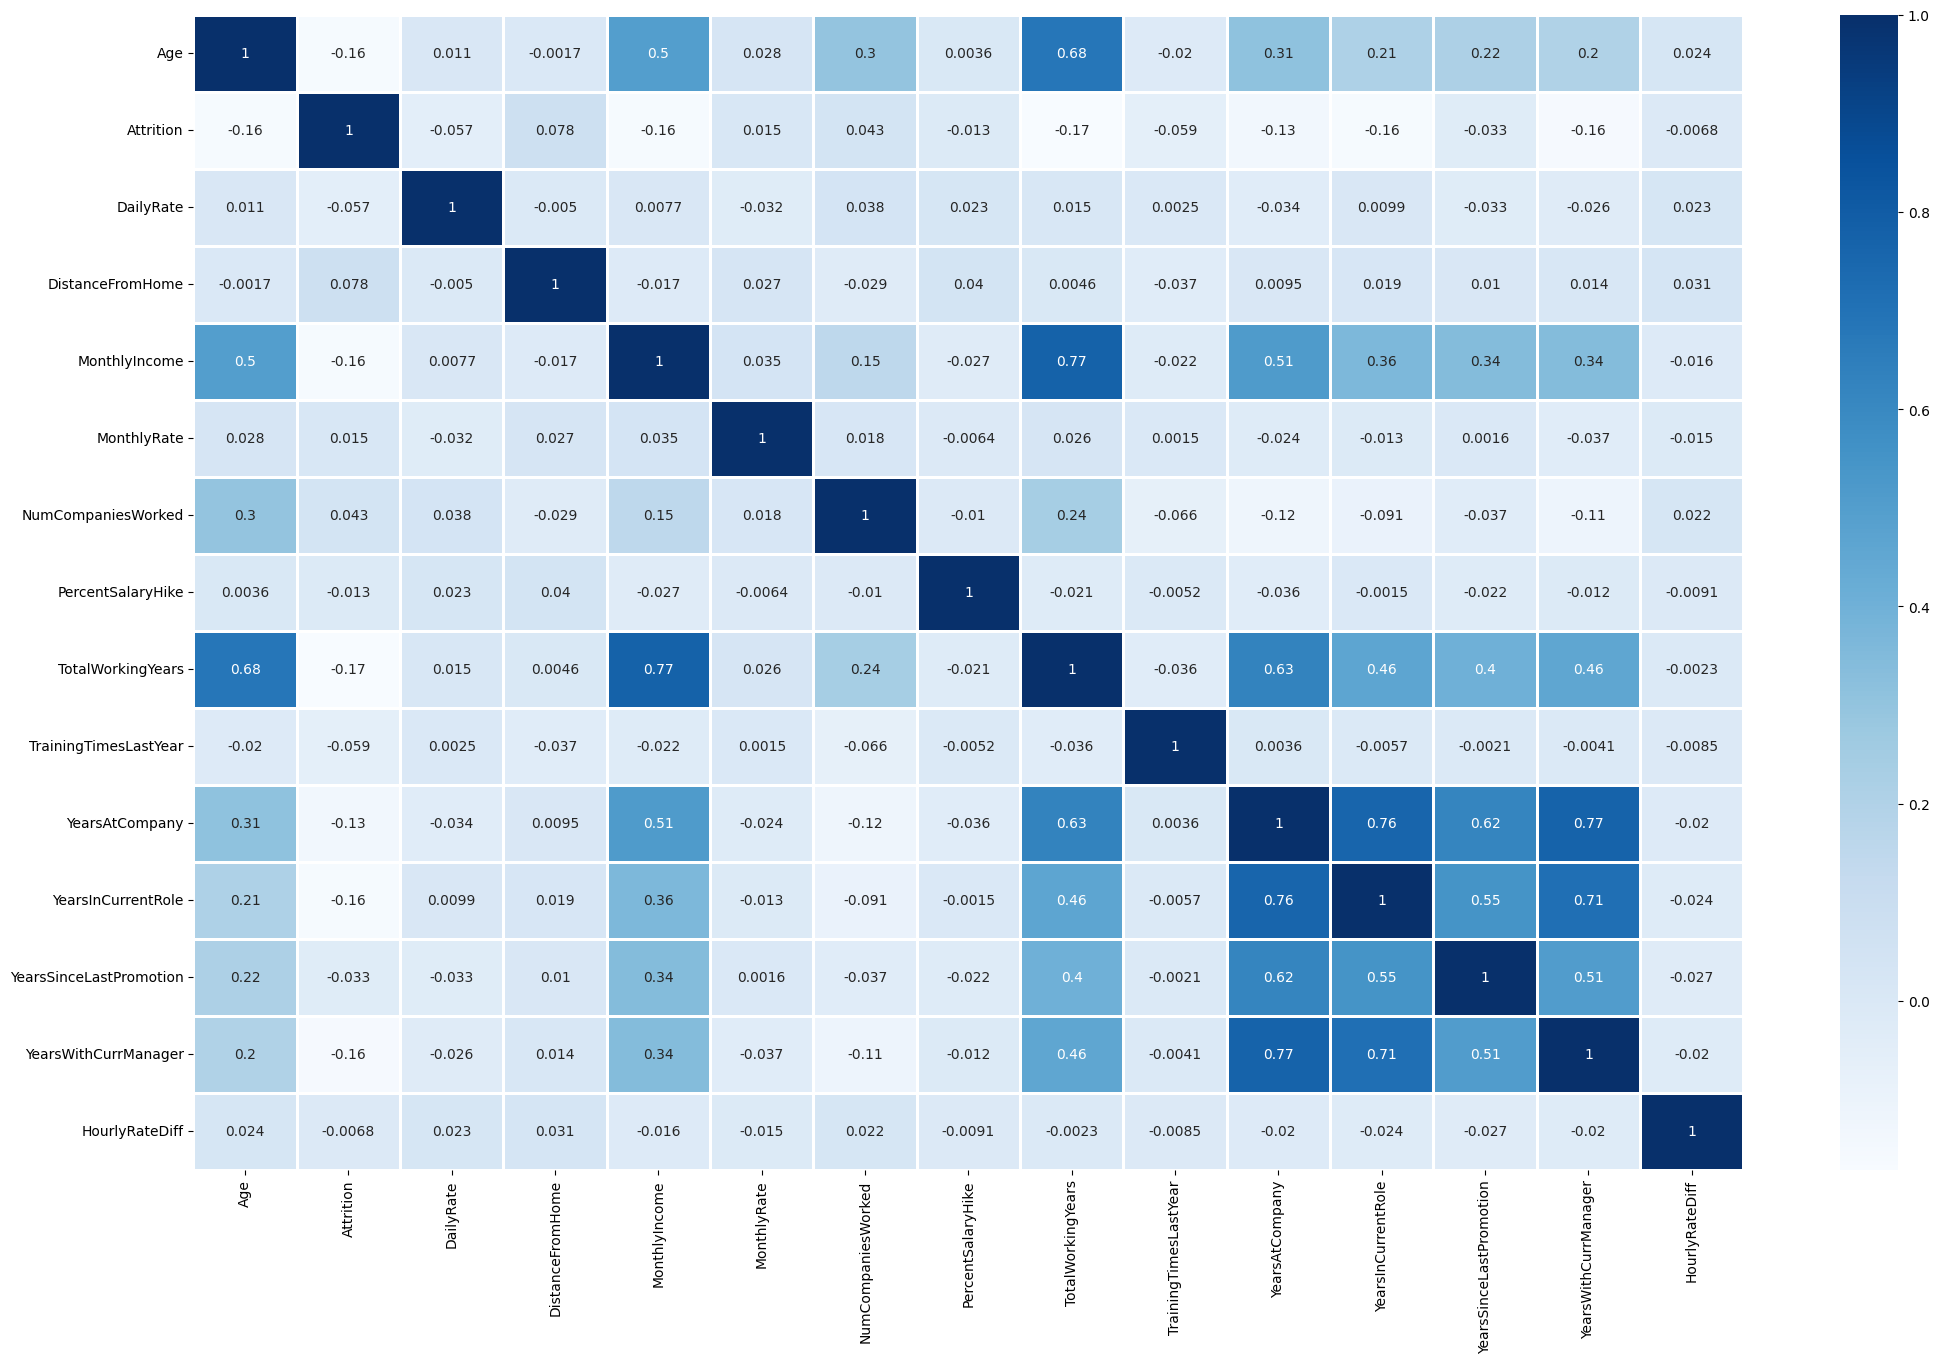

In [104]:
# Matriz de correlaciones
corr = dfnum.corr()

plt.figure(figsize = (25,15))
ax = sns.heatmap(corr, annot=True, linewidths=1, cmap='Blues')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


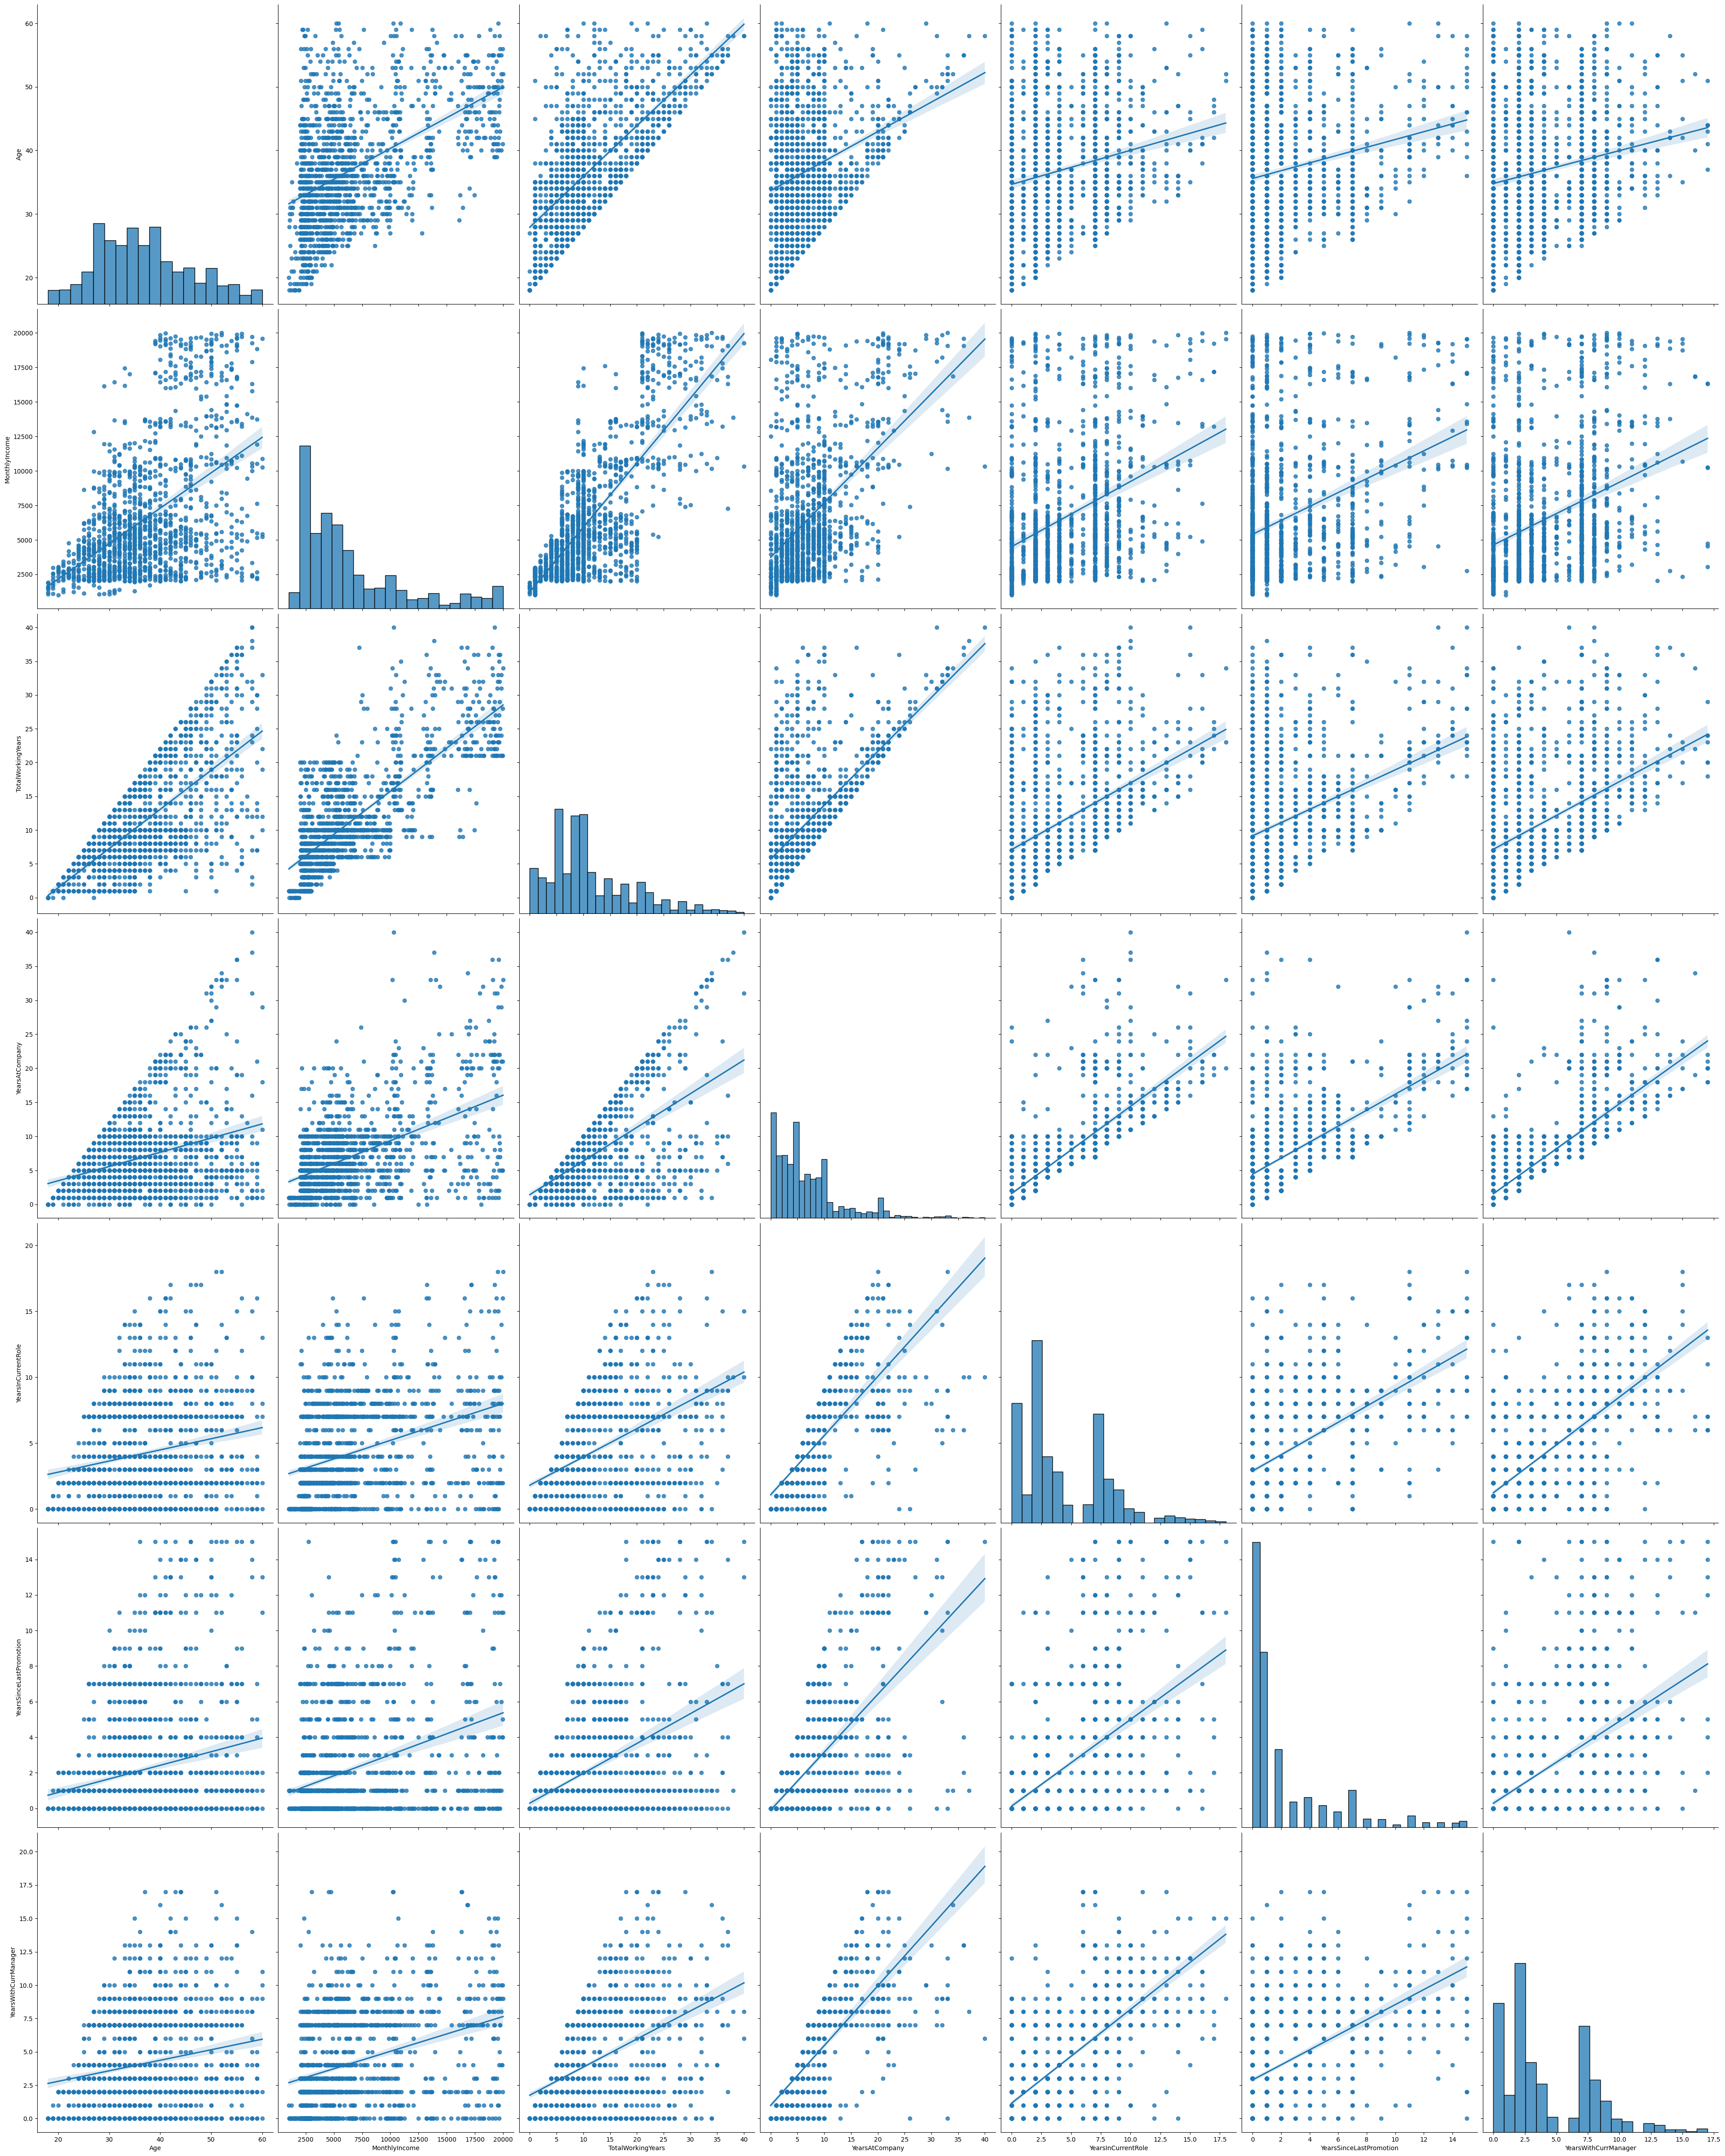

In [120]:
# Seleccionamos solo las variables más correlacionadas (>0.5)
corrcols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
maxcorr = corr.loc[corrcols, corrcols]

# ax = sns.pairplot(dfnum, x_vars=maxcorr.columns.values, y_vars=maxcorr.columns.values, height=7, aspect=0.8, kind='reg')

Existen correlaciones lineales entre las variables:

- `Age`
- `MonthlyIncome`
- `NumCompaniesWorked`
- `TotalWorkingYears`
- `YearsAtCompany`
- `YearsinCurrentRole`
- `YearsSinceLastPromotion`
- `YearsWithCurrManager`

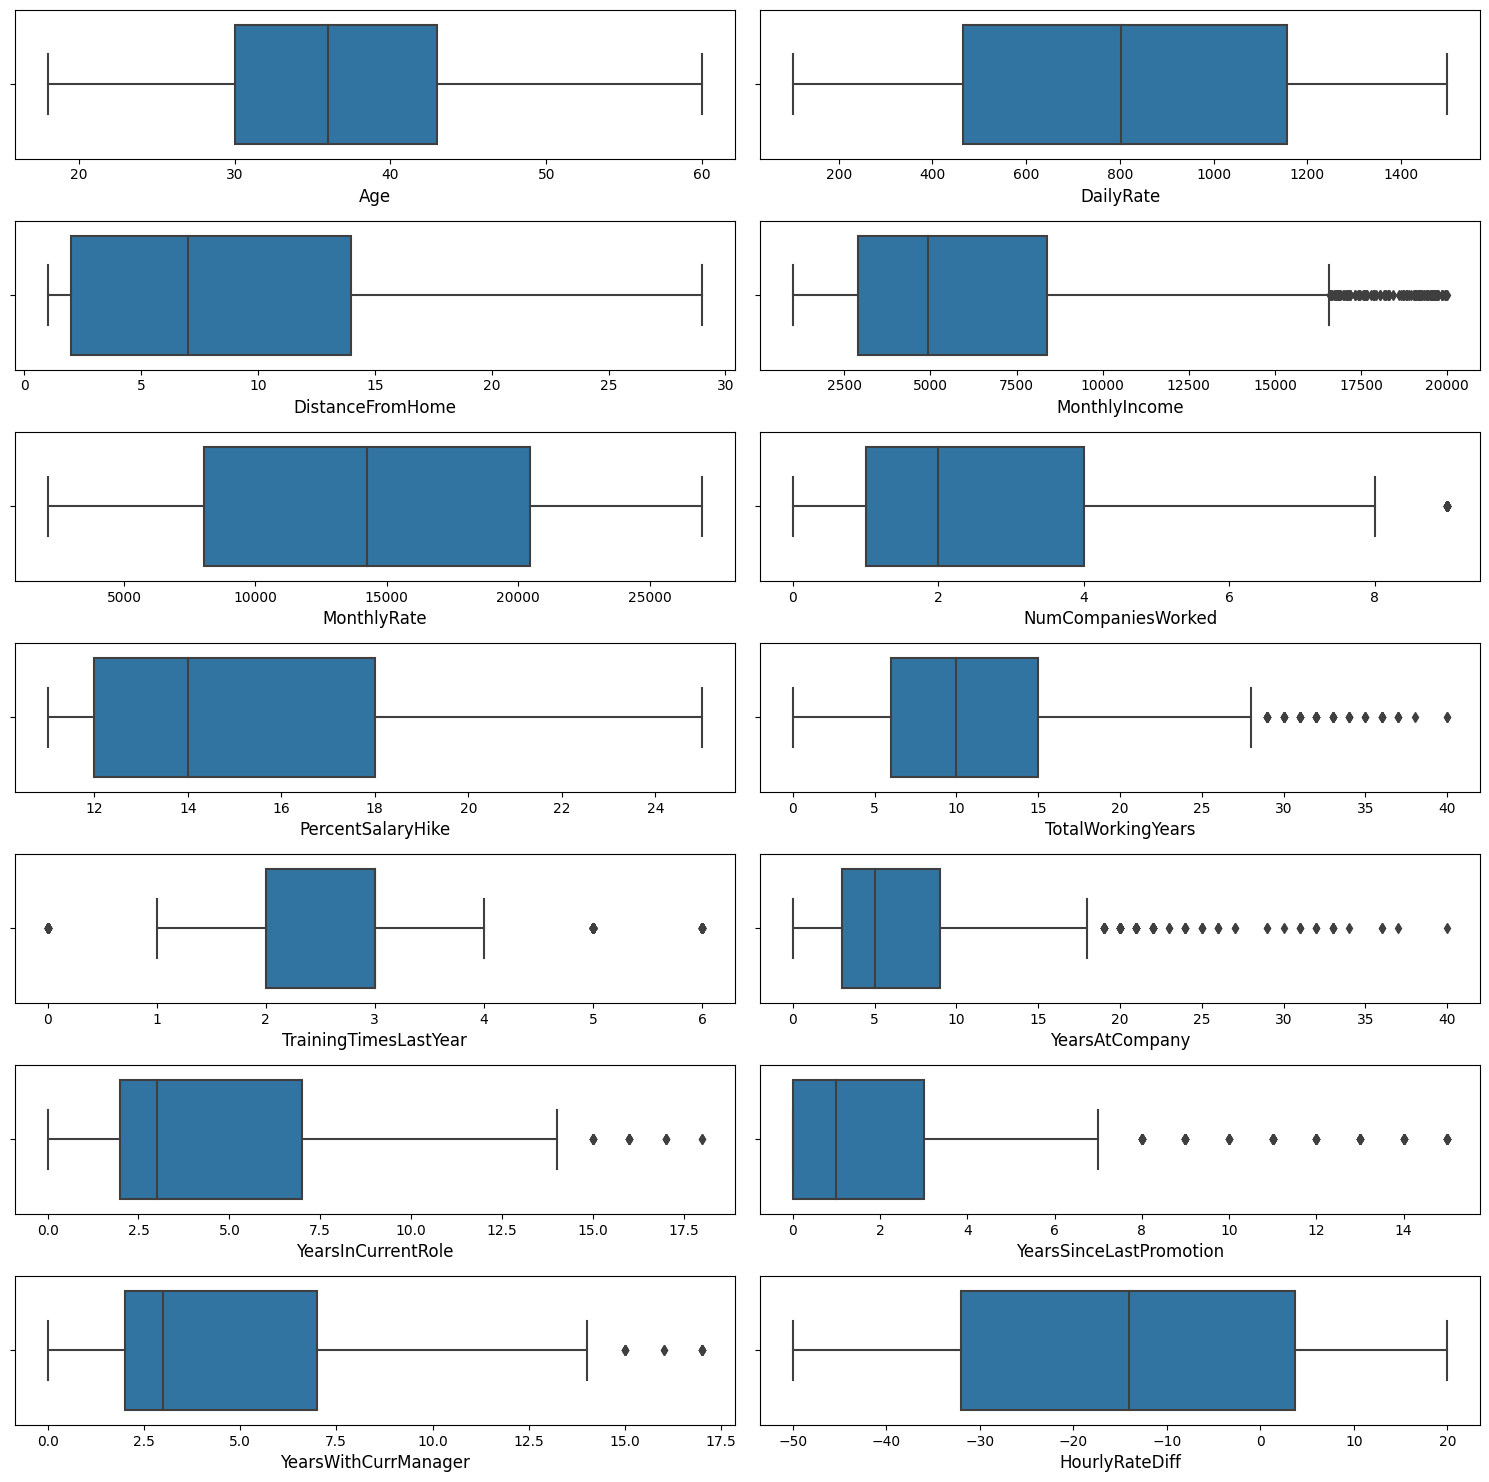

In [206]:
# Graficos de caja y bigotes para cada una de las variables numéricas
plt.figure(figsize = (15,25))

for idx, i in enumerate(dfnum.drop(columns=['Attrition']).columns):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = dfnum)
    plt.xlabel(i, size = 12)

plt.tight_layout()                     
plt.show()

In [240]:
dfnum_ = dfnum.drop(columns=['Attrition', 'MonthlyIncome', 'MonthlyRate', 'DailyRate', 'HourlyRateDiff'])  # estas variables no se pueden organizar adecuadamente en un histograma
dfnum_

,Age,DistanceFromHome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,8,11,8,0,6,4,0,5
1,49,8,1,23,10,3,10,7,1,7
2,37,2,6,15,7,3,0,0,0,0
3,33,3,1,11,8,3,8,7,3,0
4,27,2,9,12,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
1465,36,23,4,17,17,3,5,2,0,3
1466,39,6,4,15,9,5,7,7,1,7
1467,27,4,1,20,6,0,6,2,0,3
1468,49,2,2,14,17,3,9,6,0,8


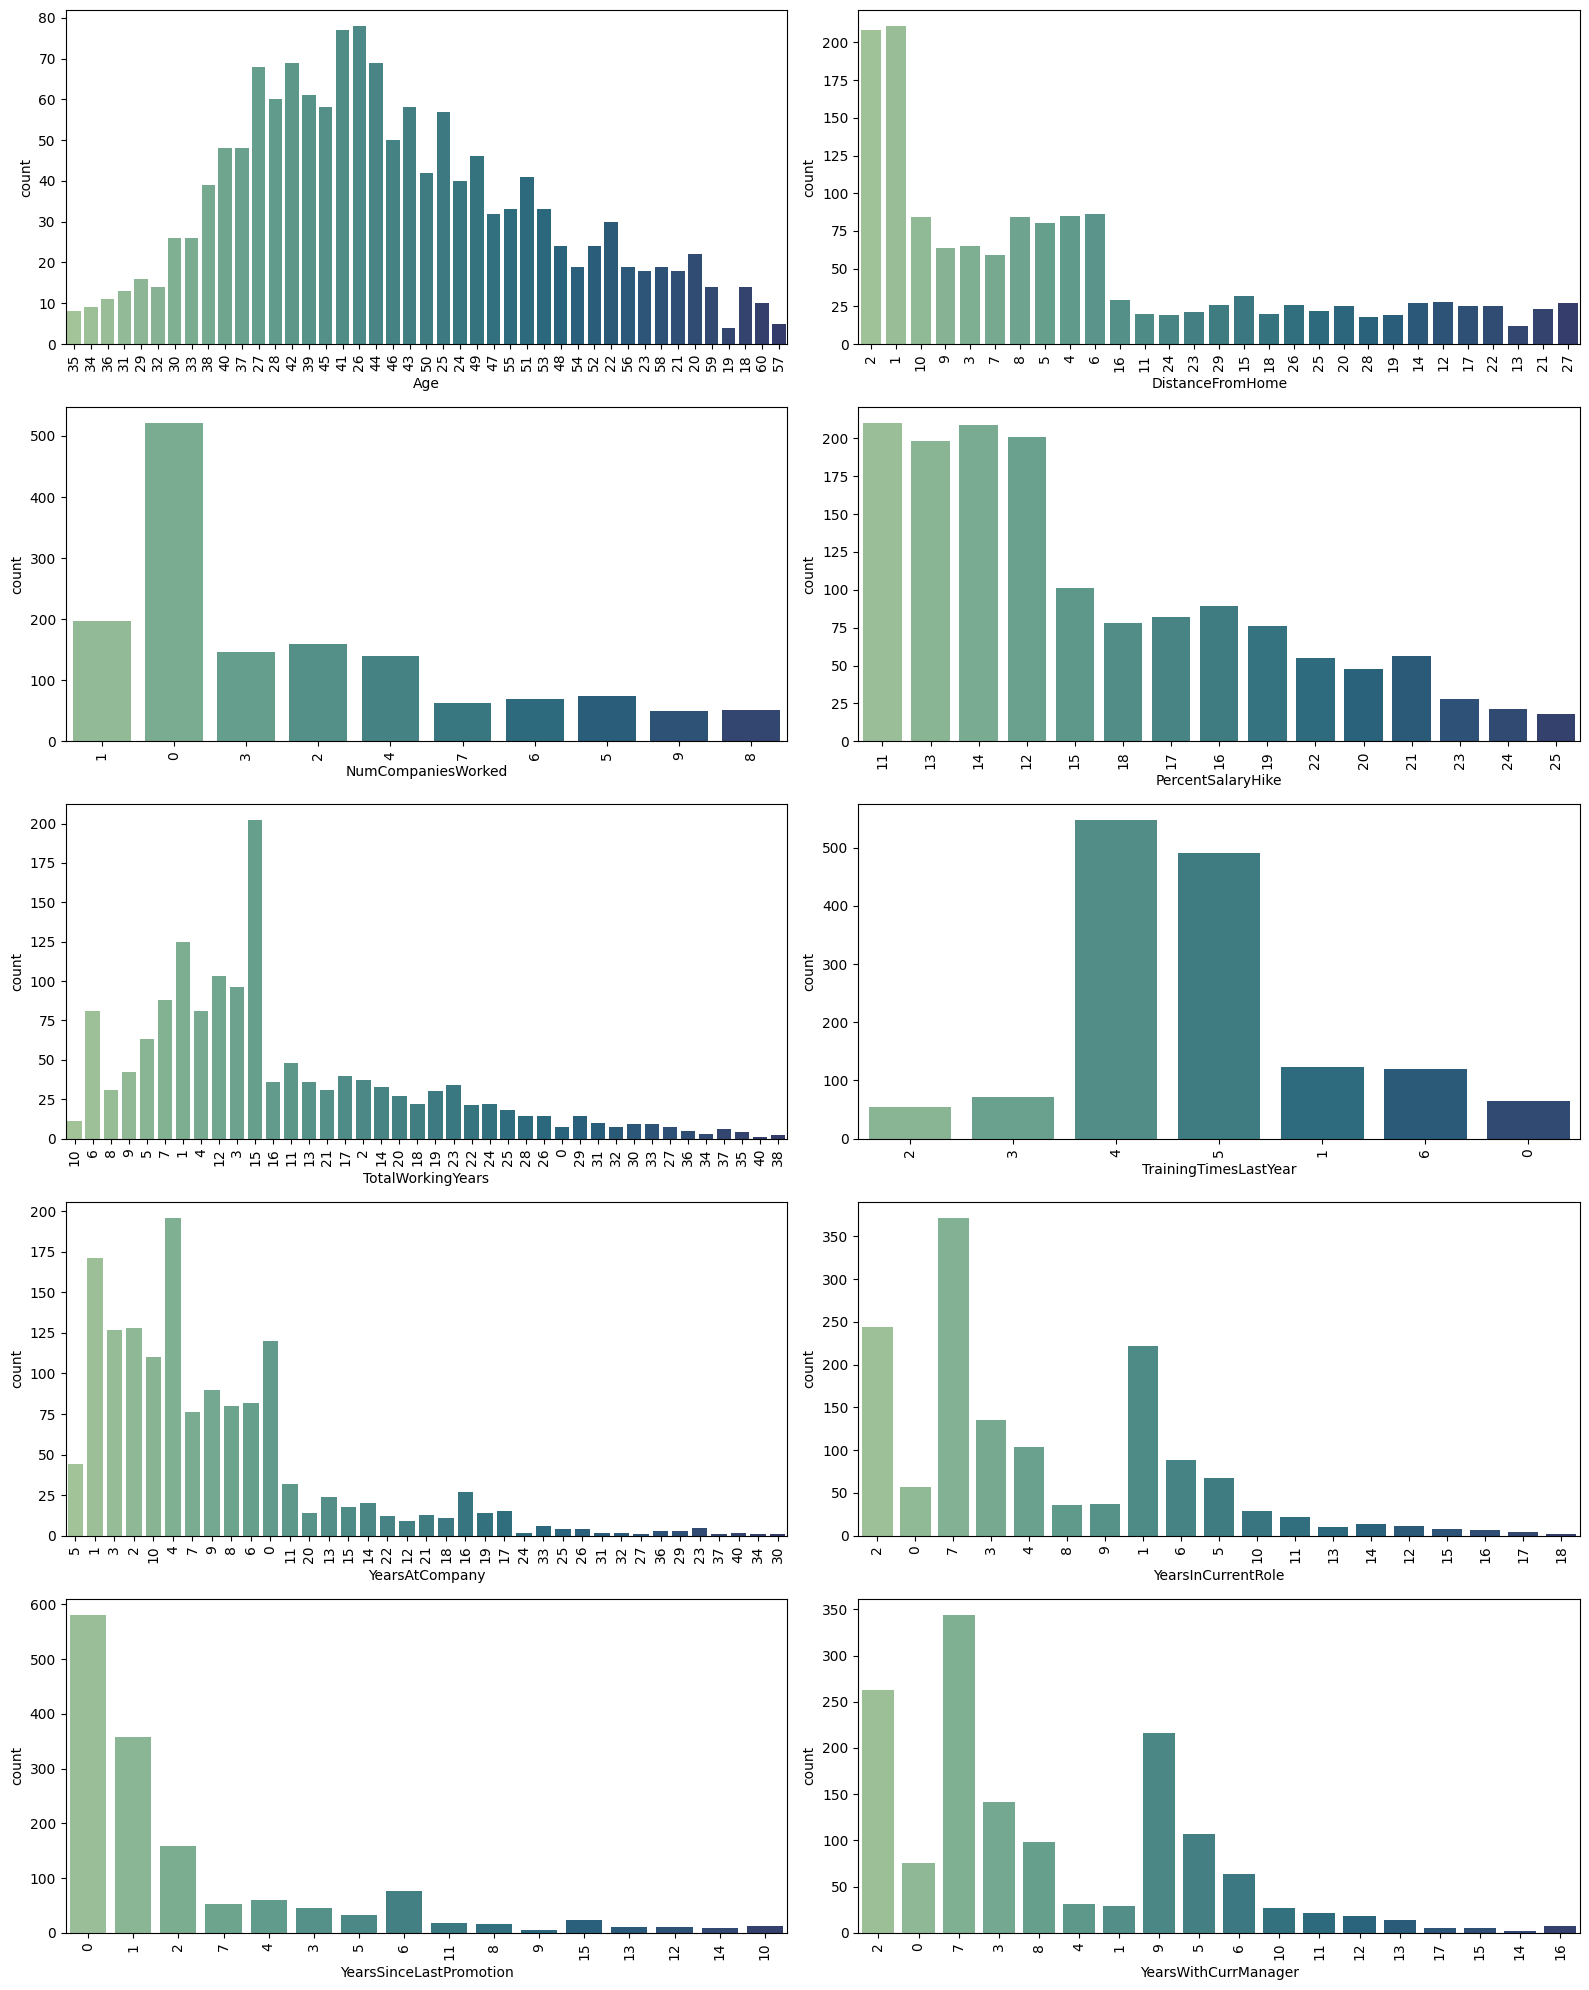

In [241]:
# Histogramas de cada una de las variables categoricas
fig, axes = plt.subplots(5, 2, figsize=(16,20))

prow = 0
pcol = 0
for col in dfnum_.columns:
    if pcol != 0 and pcol % 2 == 0:
        prow += 1
        pcol = 0
    ax = sns.countplot(data=dfnum_, x=col, ax=axes[prow,pcol], palette='crest')
    categories = [var for var in dfnum_[col].value_counts().index]
    ax.set_xticklabels(categories, rotation=90)
    pcol += 1

plt.tight_layout()
plt.show()

## Regresión Logística para la variable Attrition

In [63]:
first_model_logistic = LogisticRegression(random_state = 0, max_iter=1000)

In [64]:
X = dfnum.drop(columns = ['Attrition'])
y = dfnum['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
first_model_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [66]:
print('Score model with train set', round(first_model_logistic.score(X_train, y_train),3))
print('Score model with test set', round(first_model_logistic.score(X_test, y_test),3))

#Observe algo importante y es que tenemos que las variables usadas
#pertenecen al set de variables numericas por defecto, este modelo aunque es bueno
#No cumple con las buenas practicas debido a que los datos no se encuentran normalizados
#y/o estandarizados.
# Tampoco hemos agregado las variables categoricas al modelo, puede que existan variables
# que no aportan al modelo

Score model with train set 0.828
Score model with test set 0.848


In [67]:
# Ahora usando stats models
X_train = sm.add_constant(X_train)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()

predicciones_train = modelo.predict(exog = X_train)
clasificacion_train = np.where(predicciones_train<0.5, 0, 1)
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = clasificacion_train,
            normalize = True
           )


# Accuracy de test del modelo 
X_test = sm.add_constant(X_test, prepend=True)
predicciones_test = modelo.predict(exog = X_test)
clasificacion_test = np.where(predicciones_test<0.5, 0, 1)
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion_test,
            normalize = True
           )
print("")
print(f"El accuracy de train es: {round(100*accuracy_train,2)}%")

print("")
print(f"El accuracy de test es: {round(100*accuracy_test,2)}%")

Optimization terminated successfully.
         Current function value: 0.404662
         Iterations 7

El accuracy de train es: 82.6%

El accuracy de test es: 85.71%


In [68]:
# Ahora vamos a normalizar los datos y ajustar de nuevo el modelo
# para ver en que influye la relacion entre los datos
# por hipotesis nada debería cambiar

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaler = scaler.transform(X_test)

In [69]:
second_model_logistic = LogisticRegression(random_state = 0, max_iter=1000)
second_model_logistic.fit(X_train_scaler, y_train)
print('Score model with train set', round(second_model_logistic.score(X_train_scaler, y_train),4))
print('Score model with test set', round(second_model_logistic.score(X_test_scaler, y_test),4))

Score model with train set 0.828
Score model with test set 0.8503


In [70]:
df_cv = df.select_dtypes('int64')
df_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobSatisfaction           1470 non-null   int64
 10  MonthlyIncome             1470 non-null   int64
 11  MonthlyRate               1470 non-null   int64
 12  NumCompaniesWorked        1470 non-null   int64
 13  OverTime                  1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [71]:
third_model_logistic = LogisticRegression(random_state = 0, max_iter=1000)
scaler_third = StandardScaler()
X = df_cv.drop(columns = ['Attrition'])
y = df_cv['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaler = scaler.transform(X_test)

third_model_logistic = LogisticRegression(random_state = 0, max_iter=1000)
third_model_logistic.fit(X_train_scaler, y_train)
print('Score model with train set', round(third_model_logistic.score(X_train_scaler, y_train),4))
print('Score model with test set', round(third_model_logistic.score(X_test_scaler, y_test),4))

Score model with train set 0.8785
Score model with test set 0.8798


## Redes Neuronales para la variable Attrition

In [243]:
def ModelNN(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.Dense(26, activation="swish")(inputs)
    x = layers.Dropout(0.4)(x)
    
    #x = layers.BatchNormalization()(x)
    x = layers.Dense(100, activation="relu")(x)
    
    x = layers.Dropout(0.6)(x)
    x = layers.Dense(100, activation="relu")(x)
    
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    
    Model = keras.Model(inputs=inputs, outputs=outputs)
    
    return Model

Model = ModelNN(input_shape = X_train_scaler[1,:].shape)
Model.compile(
    optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"]
)
checkpoint = ModelCheckpoint('/kaggle/working/model_weights.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True)

Model.fit(X_train_scaler, y_train,validation_data=(X_test_scaler, y_test),
          epochs=400, batch_size=128, callbacks=[checkpoint])

Epoch 1/400
1/9 [==>...........................] - ETA: 12s - loss: 0.6666 - accuracy: 0.5625
Epoch 1: val_accuracy improved from -inf to 0.86168, saving model to /kaggle/working/model_weights.hdf5
9/9 [==============================] - 2s 51ms/step - loss: 0.5835 - accuracy: 0.6987 - val_loss: 0.4840 - val_accuracy: 0.8617
Epoch 2/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5656 - accuracy: 0.7734
Epoch 2: val_accuracy did not improve from 0.86168
9/9 [==============================] - 0s 10ms/step - loss: 0.5259 - accuracy: 0.8086 - val_loss: 0.4444 - val_accuracy: 0.8617
Epoch 3/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7534 - accuracy: 0.7188
Epoch 3: val_accuracy did not improve from 0.86168
9/9 [==============================] - 0s 9ms/step - loss: 0.5141 - accuracy: 0.8173 - val_loss: 0.4356 - val_accuracy: 0.8617
Epoch 4/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5194 - accuracy: 0.7891
Epoch 4: val_accuracy did not improve 

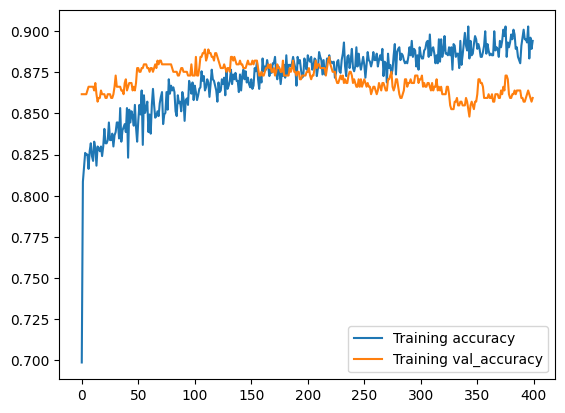

In [244]:
history_loss = Model.history.history['loss']
history_val_accuracy = Model.history.history['val_accuracy']
history_accuracy = Model.history.history['accuracy']


#plt.plot(history_loss, label = 'Training loss')
#plt.legend()
#plt.show()
plt.plot(history_accuracy, label = 'Training accuracy')
plt.plot(history_val_accuracy, label = 'Training val_accuracy')
plt.legend()
plt.show()